# ELITE exome data

In [1]:
# install.packages("tidyverse")
# install.packages("labeling",repos = "cran")
# install.packages("ggplot2",dependencies = T)
# install.packages("ggpointdensity",lib="~/R/packages3.5/",dependencies=T)
library(labeling,lib.loc = "~/R/packages3.5")
library(ggplot2,lib.loc = "~/R/packages3.5")
library(data.table)
library(labeling)
library(ggplot2)
library(ggpointdensity,lib.loc = "~/R/packages3.5")
suppressPackageStartupMessages(library(qqman))
library(corrplot)

corrplot 0.84 loaded


## Check basic stats of the ELITE exome datasets using plink

In [46]:
setwd("/oak/stanford/groups/euan/projects/elite/ukbb_exome/elite_analyze_vcf/")
freqs = fread("elite_exome.afreq",data.table=F,stringsAsFactors=F)
head(freqs)

#CHROM,ID,REF,ALT,ALT_FREQS,OBS_CT
<chr>,<chr>,<chr>,<chr>,<dbl>,<int>
1,chr1:10492:C:T,C,T,0.05421690,166
1,chr1:13273:G:C,G,C,0.17716500,508
1,chr1:13289:CCT:C,CCT,C,0.00398406,502
1,chr1:14671:G:C,G,C,0.00943396,424
1,chr1:14907:A:G,A,G,0.34134600,208
1,chr1:14930:A:G,A,G,0.40206200,194


In [47]:
hardy = fread("elite_exome.hardy",data.table=F,stringsAsFactors=F)
head(hardy)

#CHROM,ID,A1,AX,HOM_A1_CT,HET_A1_CT,TWO_AX_CT,O(HET_A1),E(HET_A1),P
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,chr1:10492:C:T,C,T,78,1,4,0.01204820,0.10255500,1.37258e-06
1,chr1:13273:G:C,G,C,180,58,16,0.22834600,0.29155600,1.06977e-03
1,chr1:13289:CCT:C,CCT,C,249,2,0,0.00796813,0.00793638,1.00000e+00
1,chr1:14671:G:C,G,C,209,2,1,0.00943396,0.01868990,1.41676e-02
1,chr1:14907:A:G,A,G,61,15,28,0.14423100,0.44965800,3.03663e-12
1,chr1:14930:A:G,A,G,52,12,33,0.12371100,0.48081600,3.45805e-14


In [48]:
missing = fread("elite_exome.vmiss",data.table=F,stringsAsFactors=F)
head(missing)

#CHROM,ID,MISSING_CT,OBS_CT,F_MISS
<chr>,<chr>,<int>,<int>,<dbl>
1,chr1:10492:C:T,184,267,0.6891390
1,chr1:13273:G:C,13,267,0.0486891
1,chr1:13289:CCT:C,16,267,0.0599251
1,chr1:14671:G:C,55,267,0.2059930
1,chr1:14907:A:G,163,267,0.6104870
1,chr1:14930:A:G,170,267,0.6367040


In [49]:
gcounts = fread("elite_exome.gcount",data.table=F,stringsAsFactors=F)
head(gcounts)

#CHROM,ID,REF,ALT,HOM_REF_CT,HET_REF_ALT_CTS,TWO_ALT_GENO_CTS,HAP_REF_CT,HAP_ALT_CTS,MISSING_CT
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,chr1:10492:C:T,C,T,78,1,4,0,0,184
1,chr1:13273:G:C,G,C,180,58,16,0,0,13
1,chr1:13289:CCT:C,CCT,C,249,2,0,0,0,16
1,chr1:14671:G:C,G,C,209,2,1,0,0,55
1,chr1:14907:A:G,A,G,61,15,28,0,0,163
1,chr1:14930:A:G,A,G,52,12,33,0,0,170


[1] 4724172

[1] 4552244

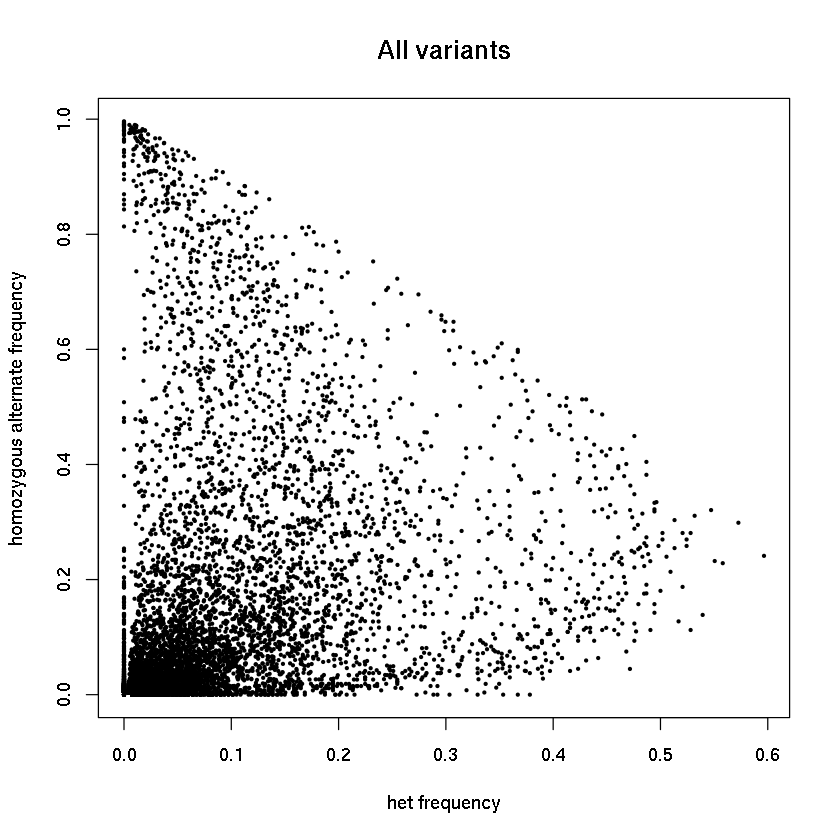

In [50]:
nrow(gcounts)
nrow(hardy)

g_avail_counts = (267 - gcounts$MISSING_CT)
summary_df = data.frame(
    ID = freqs$ID,
    g_avail_counts = g_avail_counts,
    het_freq = gcounts$HET_REF_ALT_CTS / g_avail_counts,
    minor_hom_freq = gcounts$TWO_ALT_GENO_CTS / g_avail_counts,
    mafs = freqs$ALT_FREQS,
    fmiss = missing$F_MISS,
    hwe_p = 1
)
rownames(summary_df) = summary_df$ID
summary_df[hardy$ID,"hwe_p"] = hardy$P

samp = sample(1:length(summary_df$het_freq))[1:10000]
plot(x = summary_df$het_freq[samp],summary_df$minor_hom_freq[samp],main="All variants",
    xlab = "het frequency", ylab = "homozygous alternate frequency",pch=20,cex=0.5)


  FALSE    TRUE 
2443166 2109078 


  FALSE    TRUE 
 965294 3749420 

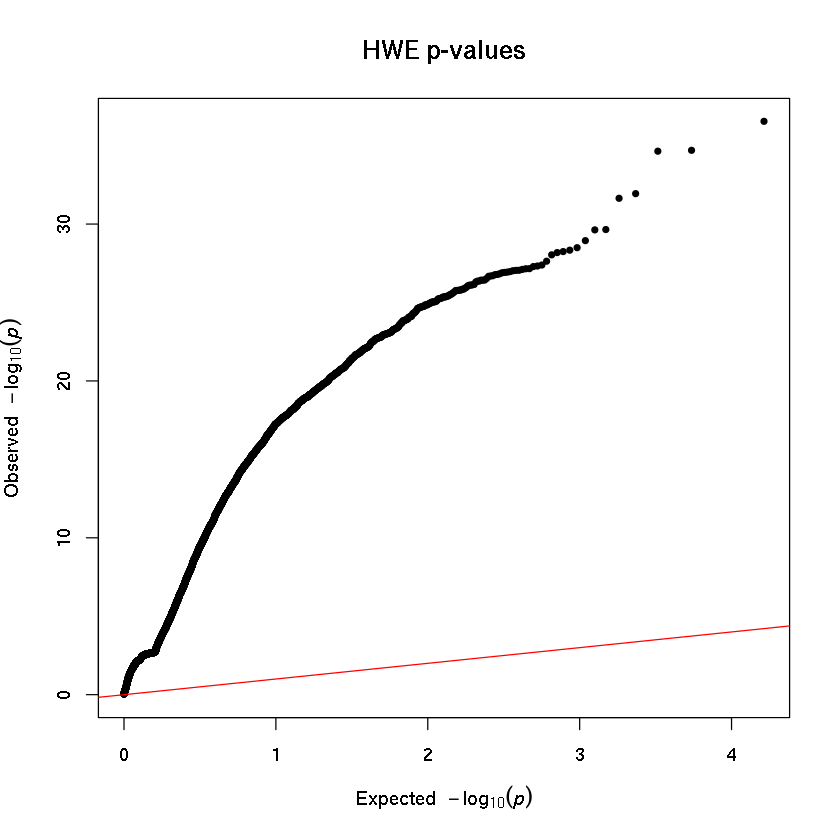

In [51]:
qq(hardy$P[samp],main="HWE p-values")
table(hardy$P<1e-04)
table(summary_df$hwe_p< 1e-04 | summary_df$mafs < 0.001 | summary_df$fmiss > 0.1)

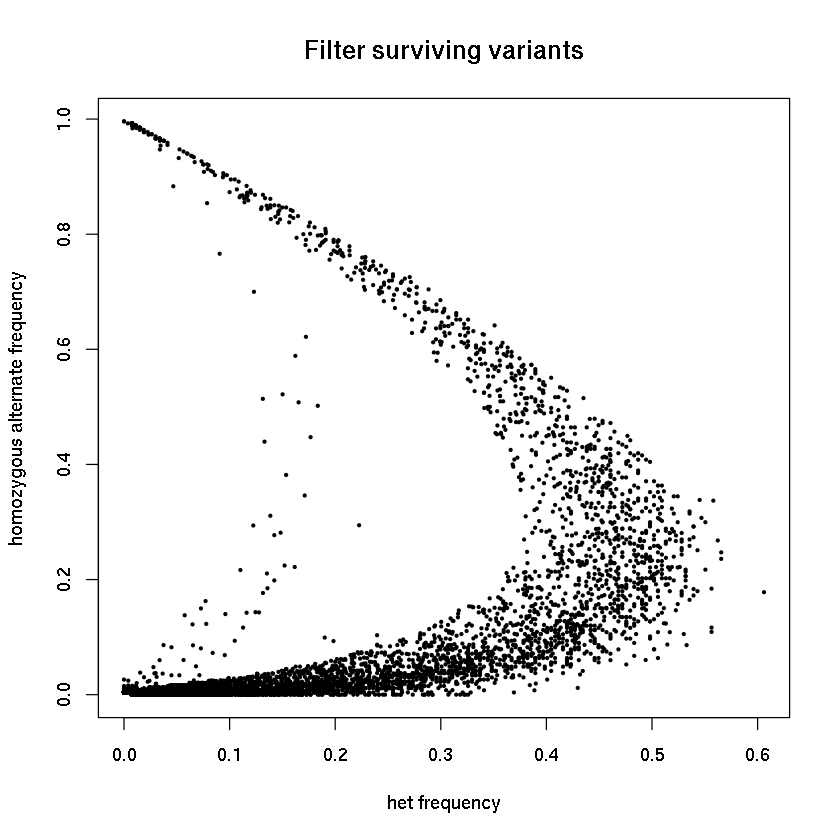

In [52]:
inds = summary_df$hwe_p< 1e-04 | summary_df$mafs < 0.001 | summary_df$fmiss > 0.1
inds = which(!inds)
samp = sample(inds)[1:10000]
plot(x = summary_df$het_freq[samp],summary_df$minor_hom_freq[samp],main="Filter surviving variants",
     xlab = "het frequency", ylab = "homozygous alternate frequency",pch=20,cex=0.5)

In [59]:
#rownames(summary_df)[1:10]
print(summary_df["chr19:54595848",])

                                   ID g_avail_counts  het_freq minor_hom_freq
chr19:54595848:T:C chr19:54595848:T:C            267 0.1947566     0.02247191
                      mafs fmiss    hwe_p
chr19:54595848:T:C 0.11985     0 0.237741
